In [16]:
import pandas, numpy, scipy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 0. user-defined variables

In [4]:
input_file = '/Users/adrian/research/akthelia/results/000_quantification/DESeq2_TPM_values.tsv'

# 1. read expression

In [5]:
expression = pandas.read_csv(input_file, sep='\t', index_col=0)
print(expression.shape)
expression

(39546, 24)


T0570_011_T24_R1  T0570_011_T24_R2  T0570_011_T24_R3  \
ENSG00000000003          8.860213          9.326157         10.499659   
ENSG00000000005          0.000000          0.000000          0.000000   
ENSG00000000419        138.378167        120.260497        160.045045   
ENSG00000000457          2.127435          1.729485          2.956090   
ENSG00000000460          4.827474          4.566990          6.748218   
...                           ...               ...               ...   
ENSG00000291297          0.000000          0.000000          0.000000   
ENSG00000291298          0.000000          0.000000          0.000000   
ENSG00000291299          2.182103          2.040683          2.485228   
ENSG00000291300          0.000000          0.000000          0.021410   
ENSG00000291301          0.000000          0.000000          0.000000   

                 T0570_011_T6_R1  T0570_011_T6_R2  T0570_011_T6_R3  \
ENSG00000000003         7.691401        11.744621         9.980379   
ENSG00000000005         0.000000         0.000000         0.000000   
ENSG00000000419        93.170740       127.545393       119.280983   
ENSG00000000457         1.494563         2.566169         2.224862   
ENSG00000000460         5.147102         7.030387         5.390039   
...                          ...              ...              ...   
ENSG00000291297         0.000000         0.000000         0.000000   
ENSG00000291298         0.000000         0.000000         0.000000   
ENSG00000291299         2.203750         3.967211         3.677709   
ENSG00000291300         0.361416         0.021903         0.000000   
ENSG00000291301         0.000000         0.022395         0.000000   

                 T0570_DMSO_T24_R1  T0570_DMSO_T24_R2  T0570_DMSO_T24_R3  \
ENSG00000000003          12.871965           7.928664          12.850338   
ENSG00000000005           0.000000           0.000000           0.000000   
ENSG00000000419         119.850366          79.046861         108.212273   
ENSG00000000457           2.728498           1.685466           2.430942   
ENSG00000000460           6.833042           4.902507           6.809534   
...                            ...                ...                ...   
ENSG00000291297           0.000000           0.000000           0.000000   
ENSG00000291298           0.000000           0.000000           0.000000   
ENSG00000291299           3.183826           2.587823           2.352475   
ENSG00000291300           0.000000           0.000000           0.000000   
ENSG00000291301           0.000000           0.008905           0.000000   

                 T0570_DMSO_T6_R1  ...  T84_011_T24_R3  T84_011_T6_R1  \
ENSG00000000003          7.974109  ...       27.364269      28.757089   
ENSG00000000005          0.000000  ...        4.266745       5.437045   
ENSG00000000419         90.223339  ...       80.096376      51.968925   
ENSG00000000457          1.552216  ...        2.618565       3.156040   
ENSG00000000460          6.568217  ...        7.064973       7.495705   
...                           ...  ...             ...            ...   
ENSG00000291297          0.000000  ...        0.193177       0.000000   
ENSG00000291298          0.000000  ...        0.000000       0.000000   
ENSG00000291299          2.759400  ...        0.786276       0.455353   
ENSG00000291300          0.079046  ...        0.116973       0.000000   
ENSG00000291301          0.000000  ...        0.000000       0.000000   

                 T84_011_T6_R2  T84_011_T6_R3  T84_DMSO_T24_R1  \
ENSG00000000003      36.863400      40.753875        27.551802   
ENSG00000000005       6.561259       5.854814         1.261758   
ENSG00000000419      93.184885      88.088689        50.494726   
ENSG00000000457       3.619716       4.367703         2.087686   
ENSG00000000460      10.214811      12.244486        10.142476   
...                        ...            ...              ...   
ENSG00000291297       0.000000       0.141508  

In [6]:
for element in expression.columns:
    print(element)

T0570_011_T24_R1
T0570_011_T24_R2
T0570_011_T24_R3
T0570_011_T6_R1
T0570_011_T6_R2
T0570_011_T6_R3
T0570_DMSO_T24_R1
T0570_DMSO_T24_R2
T0570_DMSO_T24_R3
T0570_DMSO_T6_R1
T0570_DMSO_T6_R2
T0570_DMSO_T6_R3
T84_011_T24_R1
T84_011_T24_R2
T84_011_T24_R3
T84_011_T6_R1
T84_011_T6_R2
T84_011_T6_R3
T84_DMSO_T24_R1
T84_DMSO_T24_R2
T84_DMSO_T24_R3
T84_DMSO_T6_R1
T84_DMSO_T6_R2
T84_DMSO_T6_R3


# 3. filter and transform

In [7]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(15328, 24)
(2196, 24)


In [8]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 4. visualize substantial expression

In [9]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.41847589 0.181819  ]


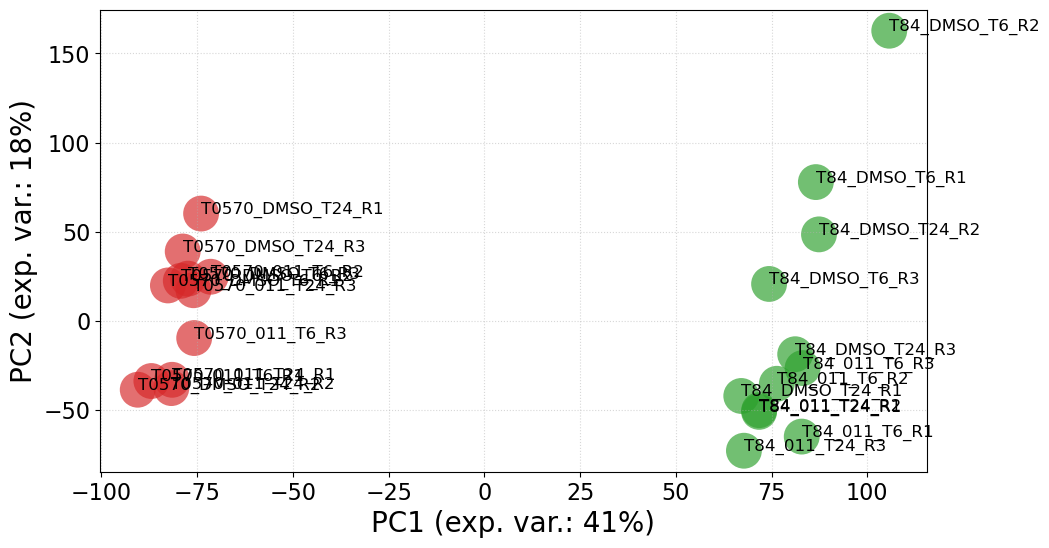

In [10]:
for i in range(len(new)):

    # colors
    if 'T0570' in expression.columns[i]:
        the_color = 'tab:red'
    else:
        the_color = 'tab:green'
    
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=the_color, marker='o', alpha=2/3, edgecolors='none')
    epsilon = 0
    matplotlib.pyplot.text(new[i,0]+epsilon, new[i,1]+epsilon, expression.columns[i], size=12)

#matplotlib.pyplot.legend(legend_elements, ['h1', 'h2 low', 'h2 high', 'KO', 'WT'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('pca.svg')

# 4. visualize high expression

In [11]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.48278878 0.17834774]


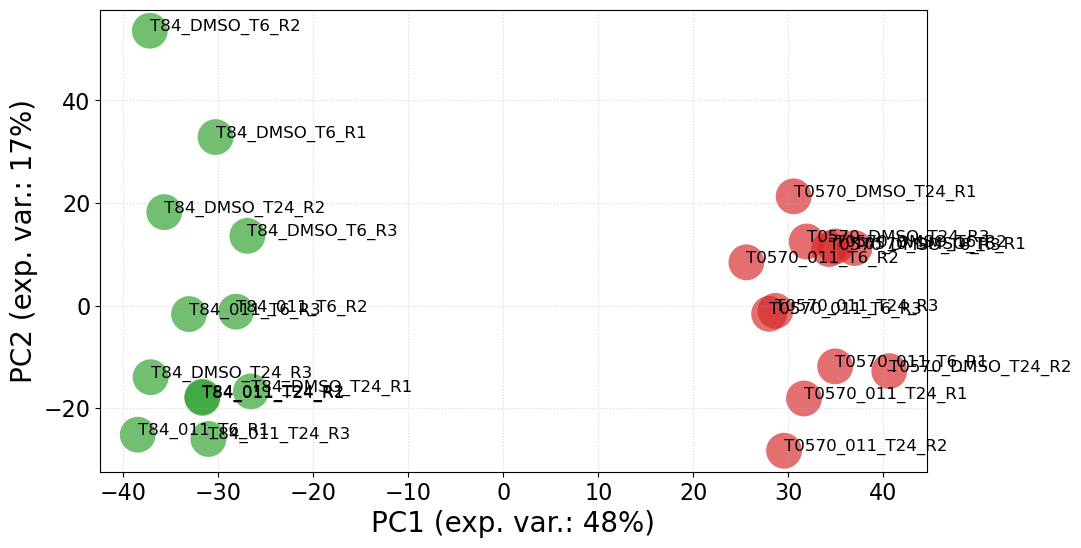

In [12]:
for i in range(len(new)):
    # colors
    if 'T0570' in expression.columns[i]:
        the_color = 'tab:red'
    else:
        the_color = 'tab:green' 
        
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=the_color, marker='o', alpha=2/3, edgecolors='none')
        
    epsilon = 0
    matplotlib.pyplot.text(new[i,0]+epsilon, new[i,1]+epsilon, expression.columns[i], size=12)
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

In [13]:
# 5. distributions

In [14]:
log2_tpm_PO = numpy.log2(expression + 1)
log2_tpm_PO.head()

T0570_011_T24_R1  T0570_011_T24_R2  T0570_011_T24_R3  \
ENSG00000000003          3.301619          3.368232          3.523519   
ENSG00000000005          0.000000          0.000000          0.000000   
ENSG00000000419          7.122861          6.921966          7.331320   
ENSG00000000457          1.644980          1.448629          1.984075   
ENSG00000000460          2.542871          2.476897          2.953864   

                 T0570_011_T6_R1  T0570_011_T6_R2  T0570_011_T6_R3  \
ENSG00000000003         3.119589         3.671817         3.456856   
ENSG00000000005         0.000000         0.000000         0.000000   
ENSG00000000419         6.557207         7.006134         6.910265   
ENSG00000000457         1.318787         1.834375         1.689238   
ENSG00000000460         2.619906         3.005469         2.675825   

                 T0570_DMSO_T24_R1  T0570_DMSO_T24_R2  T0570_DMSO_T24_R3  \
ENSG00000000003           3.794100           3.158444           3.791849   
ENSG00000000005           0.000000           0.000000           0.000000   
ENSG00000000419           6.917078           6.322773           6.770991   
ENSG00000000457           1.898594           1.425172           1.778605   
ENSG00000000460           2.969573           2.561328           2.965236   

                 T0570_DMSO_T6_R1  ...  T84_011_T24_R3  T84_011_T6_R1  \
ENSG00000000003          3.165769  ...        4.826003       4.895162   
ENSG00000000005          0.000000  ...        2.396912       2.686399   
ENSG00000000419          6.511331  ...        6.341566       5.727074   
ENSG00000000457          1.351751  ...        1.855418       2.055210   
ENSG00000000460          2.919953  ...        3.011670       3.086734   

                 T84_011_T6_R2  T84_011_T6_R3  T84_DMSO_T24_R1  \
ENSG00000000003       5.242732       5.383838         4.835510   
ENSG00000000005       2.918627       2.777118         1.177445   
ENSG00000000419       6.557424       6.477170         5.686353   
ENSG00000000457       2.207804       2.424305         1.626526   
ENSG00000000460       3.487333       3.727320         3.477998   

                 T84_DMSO_T24_R2  T84_DMSO_T24_R3  T84_DMSO_T6_R1  \
ENSG00000000003         5.431569         4.606142        5.452376   
ENSG00000000005         1.241852         1.417036        1.498400   
ENSG00000000419         6.538581         5.564444        6.773959   
ENSG00000000457         2.086667         1.879467        2.569941   
ENSG00000000460         4.200730         3.438999        4.120057   

                 T84_DMSO_T6_R2  T84_DMSO_T6_R3  
ENSG00000000003        5.541510        5.173149  
ENSG00000000005        1.085310        1.689943  
ENSG00000000419        6.858182        6.598069  
ENSG00000000457        3.110511        2.183640  
ENSG00000000460        4.902680        3.985571  

[5 rows x 24 columns]

161
16.006728167767015


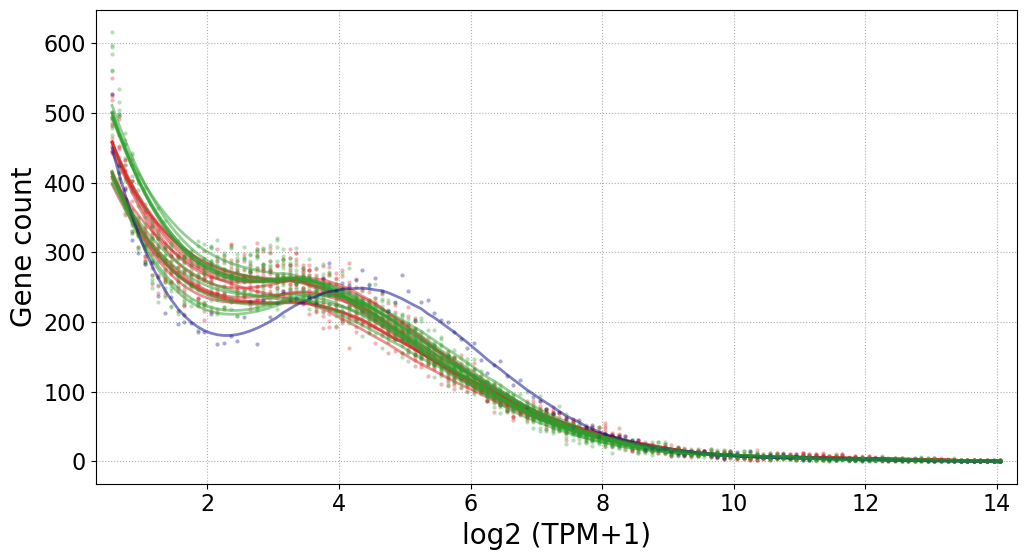

In [34]:
found_max = 16.1
number_of_bins = int(found_max*10)
print(number_of_bins)

absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()

most_likely_expressions = []
all_hats = []
for i in range(len(working_samples)):

    sample = working_samples[i]

    if new[i, 0] > 0: # east red
        the_color = 'tab:red'
    else:
        the_color = 'tab:green'

    if sample == 'T84_DMSO_T6_R2':
        the_color = 'darkblue'
    
    log2TPM = log2_tpm_PO.loc[:, sample]
    if max(log2TPM) > absolute_max:
        absolute_max = max(log2TPM)
                
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
  
    plotting_x = x[5:-20]
    plotting_hist = hist[5:-20]
    #print(plotting_x)
    
    matplotlib.pyplot.plot(plotting_x, plotting_hist, '.', alpha=1/3, mec='none', color=the_color)
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)

    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=2, alpha=1/2, color=the_color)
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)-0.25, numpy.max(plotting_x)+0.25])
#matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.tight_layout()

print(absolute_max)